# Proyecto EDA

### Análisis Univariante

2) Copia de la Base de Datos

In [72]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
file_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\data\Netflix_Movies_and_TV_Shows_cleaned.csv"
netflix_data = pd.read_csv(file_path)

# Crear una copia de la base de datos
data = netflix_data.copy()

# Mostrar las primeras filas para confirmar
print("Primeras 20 filas de la copia:")
print(data.head(20))

Primeras 20 filas de la copia:
       Title     Type        Genre  Release Year Rating  Duration  \
0    Title 1  TV Show       Comedy          1955     PG      1800   
1    Title 2  TV Show       Horror          2020      G      1800   
2    Title 3  TV Show       Action          1966  TV-PG       140   
3    Title 4    Movie     Thriller          2011  PG-13       141   
4    Title 5  TV Show      Romance          1959  TV-14       172   
5    Title 6    Movie       Action          2007  PG-13       141   
6    Title 7    Movie      Romance          1977  TV-14        68   
7    Title 8    Movie       Comedy          1971  TV-PG       104   
8    Title 9    Movie        Drama          2000  PG-13       141   
9   Title 10    Movie     Thriller          1975  TV-MA       141   
10  Title 11  TV Show      Romance          2021  TV-14       139   
11  Title 12  TV Show       Action          1986  PG-13        85   
12  Title 13    Movie  Documentary          1997      R       129   
13 

2.1) Estadísticos de centralidad

In [73]:
# Estadísticos de centralidad para la columna 'Duration'
print("Estadísticos de centralidad para 'Duration':\n")

# Media
mean_duration = data['Duration'].mean()
print(f"Media: {mean_duration:.2f}")

# Mediana
median_duration = data['Duration'].median()
print(f"Mediana: {median_duration:.2f}")

# Moda
mode_duration = data['Duration'].mode()[0]  # La primera moda si hay múltiples
print(f"Moda: {mode_duration}")

# Cuartiles
quartiles = data['Duration'].quantile([0.25, 0.5, 0.75])
print("Cuartiles:")
print(quartiles)

# Percentiles (ejemplo: 10%, 90%)
percentiles = data['Duration'].quantile([0.1, 0.9])
print("Percentiles (10% y 90%):")
print(percentiles)


Estadísticos de centralidad para 'Duration':

Media: 388.31
Mediana: 141.00
Moda: 141
Cuartiles:
0.25    118.0
0.50    141.0
0.75    179.0
Name: Duration, dtype: float64
Percentiles (10% y 90%):
0.1      82.0
0.9    1200.0
Name: Duration, dtype: float64


2.2) Estadísticos de dispersión

In [74]:
# Estadísticos de dispersión para 'Duration'
print("\nEstadísticos de dispersión para 'Duration':\n")

# Varianza
var_duration = data['Duration'].var()
print(f"Varianza: {var_duration:.2f}")

# Desviación estándar
std_duration = data['Duration'].std()
print(f"Desviación estándar: {std_duration:.2f}")

# Mínimo y máximo
min_duration = data['Duration'].min()
max_duration = data['Duration'].max()
print(f"Mínimo: {min_duration}")
print(f"Máximo: {max_duration}")

# Rango
range_duration = max_duration - min_duration
print(f"Rango: {range_duration}")



Estadísticos de dispersión para 'Duration':

Varianza: 270821.59
Desviación estándar: 520.41
Mínimo: 60
Máximo: 1800
Rango: 1740


2.3) Gráficos

2.3.1) Tabla de frecuencias


In [75]:
# Tabla de frecuencias para 'Duration'
print("\nTabla de frecuencias para 'Duration':")
print(data['Duration'].value_counts().head(10))  # Mostrar las 10 duraciones más frecuentes



Tabla de frecuencias para 'Duration':
Duration
141     759
1200    255
1800    239
600     234
97       23
173      21
104      20
90       19
111      19
77       19
Name: count, dtype: int64


2.3.2) Histograma y Función Densidad de Probabilidad

Muestra la distribución de frecuencias de la variable Duration. La línea KDE (Kernel Density Estimate) ayuda a visualizar la forma y densidad de la distribución.

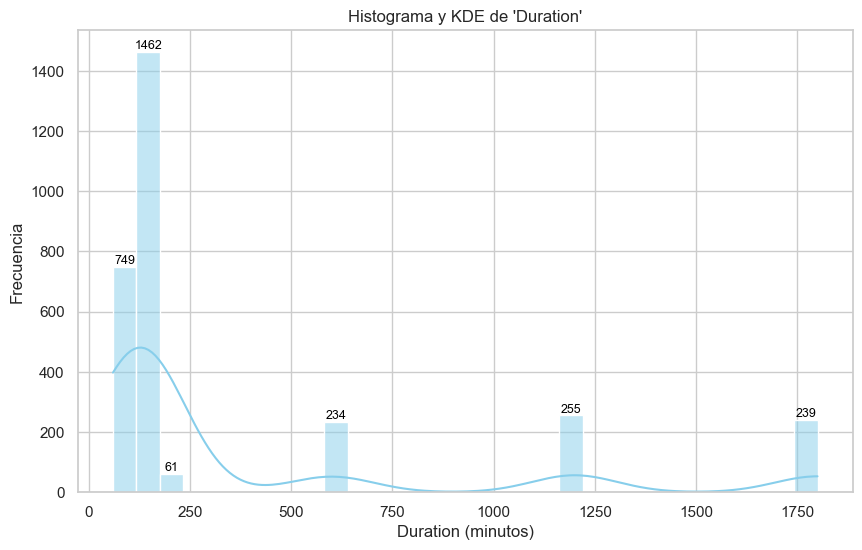

In [76]:
# Histograma y KDE con anotaciones
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Duration'], bins=30, kde=True, color="skyblue")
plt.title("Histograma y KDE de 'Duration'")
plt.xlabel("Duration (minutos)")
plt.ylabel("Frecuencia")

# Anotar valores de frecuencia en las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evita anotar en barras vacías
        plt.annotate(f"{int(height)}", 
                     (p.get_x() + p.get_width() / 2, height), 
                     ha="center", va="bottom", fontsize=9, color="black")

# Guardar la imagen
plt.savefig(r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Histograma_KDE.png")
plt.show()

- l eje X representa la duración en minutos.
- El eje Y representa la frecuencia (número de títulos con esa duración).
- La línea KDE indica la densidad: picos altos representan duraciones más comunes.

2.3.3) Boxplot (Diagrama de Caja)

Muestra la distribución de Duration, detectando valores atípicos (outliers), mediana, y el rango intercuartílico (IQR).

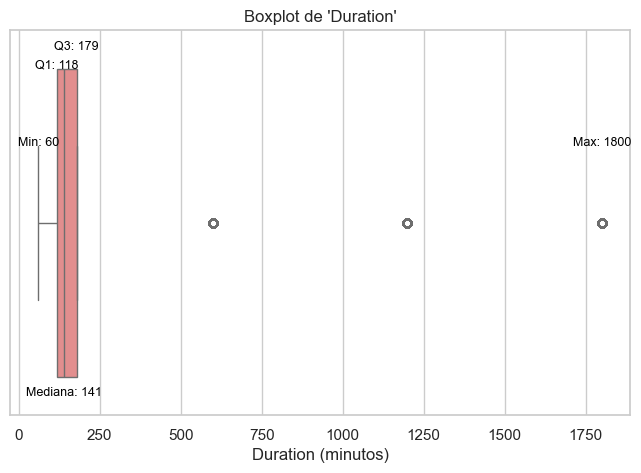

In [77]:
# Boxplot con anotaciones
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=data['Duration'], color="lightcoral")
plt.title("Boxplot de 'Duration'")
plt.xlabel("Duration (minutos)")

# Anotar valores clave (mínimo, Q1, mediana, Q3, máximo)
stats = data['Duration'].describe()
plt.text(stats['min'], -0.2, f"Min: {int(stats['min'])}", ha="center", color="black", fontsize=9)
plt.text(stats['25%'], -0.4, f"Q1: {int(stats['25%'])}", ha="center", color="black", fontsize=9)
plt.text(stats['50%'], +0.45, f"Mediana: {int(stats['50%'])}", ha="center", color="black", fontsize=9)
plt.text(stats['75%'], -0.45, f"Q3: {int(stats['75%'])}", ha="center", color="black", fontsize=9)
plt.text(stats['max'], -0.2, f"Max: {int(stats['max'])}", ha="center", color="black", fontsize=9)

# Guardar la imagen
plt.savefig(r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Boxplot_Duration.png")
plt.show()


- La caja central representa el IQR (Q1 al Q3).
- La línea dentro de la caja es la mediana.
- Los "bigotes" muestran el rango (mínimo y máximo).
- Los puntos fuera de los bigotes son outliers (valores atípicos).

2.3.4) Diagrama de Barras para Variables Categóricas

Distribución de Type (Movies vs TV Shows).

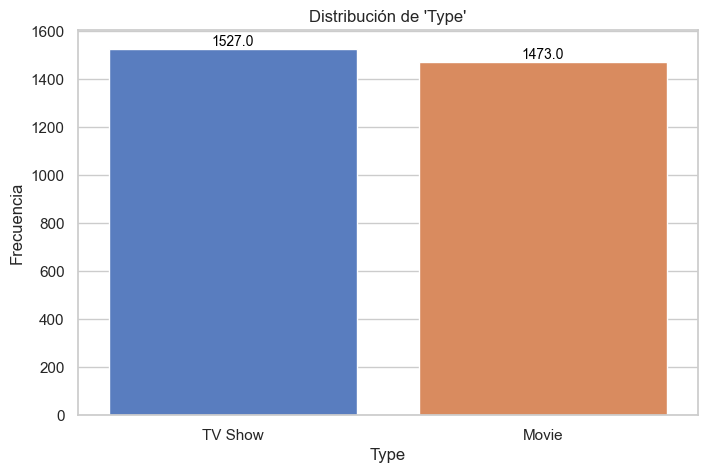

In [78]:
# Diagrama de barras con anotaciones
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Type', hue='Type', data=data, palette="muted", legend=False)
plt.title("Distribución de 'Type'")
plt.xlabel("Type")
plt.ylabel("Frecuencia")

# Anotar valores en las barras
for p in ax.patches:
    height = p.get_height()
    plt.annotate(f"{height}", 
                 (p.get_x() + p.get_width() / 2, height), 
                 ha="center", va="bottom", fontsize=10, color="black")

# Guardar la imagen
plt.savefig(r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Diagrama_Barras_Type.png")
plt.show()

- El eje X representa las categorías de Type (Movies y TV Shows).
- El eje Y muestra la frecuencia (cantidad de títulos).
- Los números sobre las barras indican la cantidad exacta de registros.

2.3.5) Violin Plot

La densidad de los datos, mostrando la distribución completa de Duration.

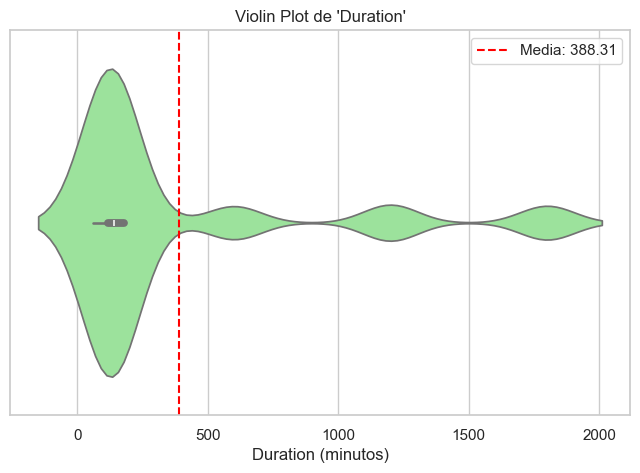

In [79]:
# Violin Plot con anotaciones en el eje X
plt.figure(figsize=(8, 5))
sns.violinplot(x=data['Duration'], color="lightgreen")
plt.title("Violin Plot de 'Duration'")
plt.xlabel("Duration (minutos)")

# Anotar valores clave
plt.axvline(data['Duration'].mean(), color="red", linestyle="--", label=f"Media: {data['Duration'].mean():.2f}")
plt.legend()

# Guardar la imagen
plt.savefig(r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_ViolinPlot_Duration.png")
plt.show()


- La forma del gráfico muestra la distribución completa (simetría, picos).
- La línea punteada roja indica la media.
- El ancho del gráfico representa la densidad de valores.

2.3.6) Guardar Imagenes en Modo Collage

In [80]:
from PIL import Image

# Rutas de las imágenes individuales
img_paths = [
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Histograma_KDE.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Boxplot_Duration.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Diagrama_Barras_Type.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_ViolinPlot_Duration.png"
]

# Cargar las imágenes
images = [Image.open(img) for img in img_paths]

# Imagen combinada (2x2)
width, height = images[0].size  
combined_width = width * 2
combined_height = height * 2

# Crear un nuevo lienzo en blanco
combined_image = Image.new("RGB", (combined_width, combined_height), color="white")

# Pegar cada imagen en su posición correspondiente
combined_image.paste(images[0], (0, 0))                  # Arriba izquierda
combined_image.paste(images[1], (width, 0))              # Arriba derecha
combined_image.paste(images[2], (0, height))             # Abajo izquierda
combined_image.paste(images[3], (width, height))         # Abajo derecha

# Guardar la imagen combinada
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Univariante_Graficos_Combinados.png"
combined_image.save(output_path)

# Mostrar
combined_image.show()  # Mostrar la imagen combinada